# Breast Cancer Prediction By Using XGBoost Algorithm

![](https://www.nidirect.gov.uk/sites/default/files/images/news/cervical-cancer-cell.jpg)
Dataset=https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

#Acknowledgements:

This dataset has been referred from Kaggle

# Importing the all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## import Dataset

In [2]:
data1=pd.read_csv(r'C:\Users\JIBSON JOY\Artificial_intelligence\EDA\supervised_learning\Logistic_Regression\breast_cancer_data.csv')

In [3]:
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data1.shape


(569, 33)

In [5]:
data1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# remove 'id' column from the dataset
data1.drop(['id','Unnamed: 32'],axis=1,inplace=True)

# Basics EDA

In [7]:
[feature for feature in data1.columns if data1[feature].isnull().sum()>0]

[]

In [8]:
data1.shape

(569, 31)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### map function for mapping benign into 0 and malignant into 1

In [10]:
data1['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
data1['diagnosis']=data1['diagnosis'].map({'B':0,'M':1})

In [12]:
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
data1.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

# Finding Outliers

<AxesSubplot:xlabel='texture_mean'>

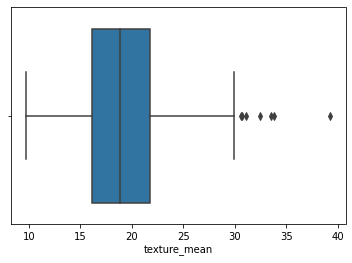

In [49]:
sns.boxplot(data1['texture_mean'])


In [44]:
numericalColumns = data1.select_dtypes(include=np.number).columns
numericalColumns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [46]:
descriateCols=[]
continuesCols=[]

for column in numericalColumns:
    if data1[column].nunique()>20:
        continuesCols.append(column)
    else:
        descriateCols.append(column)

In [47]:
continuesCols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [50]:
for column in continuesCols:
    upper_lim=data1[column].mean()+data1[column].std() *3
    lower_lim=data1[column].mean()-data1[column].std() *3

    data1.loc[(data1[column] > upper_lim),column] = upper_lim
    data1.loc[(data1[column] < lower_lim),column] = lower_lim

<AxesSubplot:xlabel='texture_mean'>

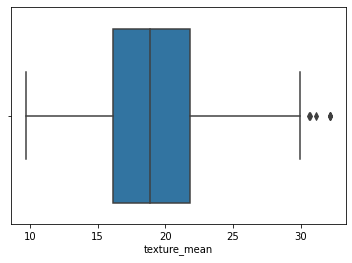

In [51]:
sns.boxplot(data1['texture_mean'])


# Train-Test_Split

In [52]:
X=data1.drop(['diagnosis'],axis=1)
y=data1['diagnosis']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=42)

# Scale Down The Dataset

In [64]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

import joblib 
joblib.dump(scale,'scale.pkl')

['scale.pkl']

# Smote Method

In [65]:
data1['diagnosis'].value_counts()  #### here, there is a inbalance,so we use smote (creating synthetic data)

0    357
1    212
Name: diagnosis, dtype: int64

In [66]:
! pip install imbalanced-learn

In [67]:
!pip install scikit-learn==1.1.0 --user

In [68]:
from sklearn.metrics import DistanceMetric as _DistanceMetric


In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [70]:
X_res,y_res=sm.fit_resample(X_train,y_train)

In [71]:
y_train.value_counts()

0    236
1    145
Name: diagnosis, dtype: int64

In [72]:
y_res.value_counts() # Smote 

1    236
0    236
Name: diagnosis, dtype: int64

# Import XGBoost

In [73]:
! pip install xgboost

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tunning

In [75]:

params = [{"learning_rate":[0.05,0.10],
"max_depth":[3,4,5],
"min_child_weight":[1,3],
"gamma":[0.0,0.1],
"colsample_bytree":[0.3,0.4]}]

In [76]:
xgb_clf = XGBClassifier()

grid_clf = GridSearchCV(xgb_clf,params,cv=10,scoring="accuracy")

In [89]:
model=grid_clf.fit(X_res,y_res)

In [82]:
grid_clf.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1}

In [83]:
grid_clf.score(X_res,y_res) # overfitting

1.0

In [91]:
grid_clf.score(X_test,y_test)

0.9627659574468085

In [85]:
y_pred= grid_clf.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,118,3
1,4,63


from sklearn.

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       121
           1       0.95      0.94      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



# Saving the model

In [90]:
import joblib 
joblib.dump(model,'model.pkl')

['model.pkl']

# Conclusions


1.The project result shows Overfitting and XGboost shows the higher accuracy on the training and test datasets.

2 We have manually tuned some hyper parameters and alse used gridsearchCv also.

3.XGBoost gives accuracy score in training data is 1, and accuracy score in test data is .96%